# Relationship_biomass_pg_th_ready_for_git

This notebook collates basal factor allometry ‘field data’ with persistent green zonal statistics and plots the data.
notebook infromation:
 - environment: zonal
 - author: Rob McGregor
 - date: 28/08/2022
 - licence: MIT

In [4]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [5]:
#zonal stats directory containing persistant green sub dir with zonal stats data
dir_ = r"F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220828_1908_biomass_w_2013_obs"

# site total csv file produced from Biomass Field Data Clean
bio_path = r"Z:\Scratch\Rob\tern\tree_biomass_field_data\biomass_carbon\biomass_field_data_clean\biomass_totals_v1.csv"
bio_path = r"C:\Users\rmcgr\ntg_repository\tern\tree_biomass_field_data\biomass_carbon\biomass_field_data_clean\biomass_totals_v1.csv"

int_output_dir = r"C:\Users\rmcgr\ntg_repository\tern\outputs\scratch"
output_dir = r"C:\Users\rmcgr\ntg_repository\tern\outputs"

In [6]:
# th_dir = os.path.join(dir_, "th_zonal_stats")
# pg_dir = os.path.join(dir_, "pg_zonal_stats")
pg_dir = r"F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats"

In [7]:
def glob_dir(dir_):
    
    """ This function searches for .csv files within the directory and, concatenates a complete dataframe.
    
    :param dir_: string object containing the path to a directory filled with persistent green zonal stat outputs.
    :return output: concatenated pandas dataframe object containing all persistent green zonal stats.
    """
    
    df_list = []
    for file_ in glob(os.path.join(dir_, "*.csv")):
        print(file_)
        df = pd.read_csv(file_)
        df_list.append(df)
        
    output = pd.concat(df_list)
    #print(output)
    return output
    

In [8]:
#th_df = glob_dir(th_dir)
pg_df = glob_dir(pg_dir)

F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\atl24a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\btl01a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\btl02a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\btl03a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\btl05a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\btl06a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\btl07a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\rmcgr_20220830_1305_up_to_date\ref_zonal_stats\eva02a_103072_ref_zonal_stats.csv
F:\from_z_20220916\biomass_zonal_stats\r

In [27]:
pg_df.sample(2)

,uid,site,ref_image,year,month,day,b1_ref_count,b1_ref_min,b1_ref_max,b1_ref_mean,...,b7_ref_med,b7_ref_std,b7_ref_p25,b7_ref_p50,b7_ref_p75,b7_ref_p95,b7_ref_p99,b7_ref_range,st_date,end_date
12,12,hls04a,l5tmre_p103r072_20090419_dbgm3_zstdmask.img,2009,4,19,12.0,744.0,814.0,778.50,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,r072_201,00904130
27,4,btl03a,l5tmre_p103r072_20110730_dbgm3_zstdmask.img,2011,7,30,12.0,490.0,585.0,538.75,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,r072_201,01107331


In [26]:
print(pg_df.columns)

Index(['uid', 'site', 'ref_image', 'year', 'month', 'day', 'b1_ref_count',
       'b1_ref_min', 'b1_ref_max', 'b1_ref_mean', 'b1_ref_med', 'b1_ref_std',
       'b1_ref_p25', 'b1_ref_p50', 'b1_ref_p75', 'b1_ref_p95', 'b1_ref_p99',
       'b1_ref_range', 'b2_ref_count', 'b2_ref_min', 'b2_ref_max',
       'b2_ref_mean', 'b2_ref_med', 'b2_ref_std', 'b2_ref_p25', 'b2_ref_p50',
       'b2_ref_p75', 'b2_ref_p95', 'b2_ref_p99', 'b2_ref_range',
       'b3_ref_count', 'b3_ref_min', 'b3_ref_max', 'b3_ref_mean', 'b3_ref_med',
       'b3_ref_std', 'b3_ref_p25', 'b3_ref_p50', 'b3_ref_p75', 'b3_ref_p95',
       'b3_ref_p99', 'b3_ref_range', 'b4_ref_count', 'b4_ref_min',
       'b4_ref_max', 'b4_ref_mean', 'b4_ref_med', 'b4_ref_std', 'b4_ref_p25',
       'b4_ref_p50', 'b4_ref_p75', 'b4_ref_p95', 'b4_ref_p99', 'b4_ref_range',
       'b5_ref_count', 'b5_ref_min', 'b5_ref_max', 'b5_ref_mean', 'b5_ref_med',
       'b5_ref_std', 'b5_ref_p25', 'b5_ref_p50', 'b5_ref_p75', 'b5_ref_p95',
       'b5_ref_p99', '

In [10]:
# site total csv file produced from Biomass Field Data Clean
bio = pd.read_csv(bio_path)
bio.sample(2)
print(bio.shape)

(69, 18)


In [38]:
def itterrows_df(df):
    
    """ This function iterates over a dataframe and splices the image name variable to extract the start and 
    end dates of the seasonal image zonal stats.
    
    :param df: dataframe object containing zonal stats of persistent green Landsat seasonal composites.
    :return df: dataframe object containing the input dataframe with two additional columns - st_date and end_date.
    """
    
    list_s = []
    list_e = []
    for index, row in df.iterrows():
        im = row["ref_image"]
        year = im[-27:-23]
        #print(year)
        month = im[-23:-21]
        print(month)
        
        from calendar import monthrange
        month_, day_range = monthrange(int(year), int(month))
        list_s.append(im[-27:-21] + "01")
        list_e.append(im[-27:21] + str(day_range))

        
    df["st_date"] = list_s
    df["end_date"] = list_e
    
    return df
        

In [39]:
pg_df = itterrows_df(pg_df)

01
03
03
04
05
05
08
09
10
11
01
03
04
05
05
07
08
09
09
11
11
12
01
02
02
04
12
07
08
09
02
04
05
06
07
07
08
11
11
12
01
02
02
03
04
05
07
09
09
10
11
11
12
01
03
04
06
08
08
09
11
07
08
08
09
09
10
11
01
05
06
07
08
09
10
11
12
01
03
04
05
06
08
04
04
06
06
07
07
08
08
09
01
03
03
04
05
05
08
09
10
11
01
03
04
05
05
07
08
09
09
11
11
12
01
02
02
04
12
07
08
09
02
04
05
06
07
07
08
11
11
12
01
02
02
03
04
05
07
09
09
10
11
11
12
01
03
04
06
08
08
09
11
07
08
08
09
09
10
11
01
05
06
07
08
09
10
11
12
01
03
04
05
06
08
04
04
06
06
07
07
08
08
09
01
03
03
04
05
05
08
09
10
11
01
03
04
05
05
07
08
09
09
11
11
12
01
02
02
04
12
07
08
09
02
04
05
06
07
07
08
11
11
12
01
02
02
03
04
05
07
09
09
10
11
11
12
01
03
04
06
08
08
09
11
07
08
08
09
09
10
11
01
05
06
07
08
09
10
11
12
01
03
04
05
06
08
04
04
06
06
07
07
08
08
09
01
03
03
04
05
05
08
09
10
11
01
03
04
05
05
07
08
09
09
11
11
12
01
02
02
04
12
07
08
09
02
04
05
06
07
07
08
11
11
12
01
02
02
03
04
05
07
09
09
10
11
11
12
01
03
04
06
0

In [40]:
#export persistent green dataframe to intermediate output directory
pg_df.to_csv(os.path.join(int_output_dir, "ref_df.csv"))

In [41]:
def date_time(pg_df):
    """ This function adds two date time columns from the start and end columns.
    
    :param pg_df: dataframe object containing the persistent green data.
    :return pg_df: dataframe object containing the persistent green data.
    """
    pg_df['st_date_dt'] = pd.to_datetime(pg_df['st_date'])
    pg_df['end_date_dt'] = pd.to_datetime(pg_df['end_date'])
    
    return pg_df

In [42]:
pg_df = date_time(pg_df)

ParserError: year 2008031 is out of range: 2008031

In [43]:
bio.sample(5)

,uid,site,date,lon_gda94,lat_gda94,factor_x,count,avg_alive,avg_dead,avg_total,total_leaves,total_twigs,total_bark,total_wood,total_bran,total_stems,total_agb,total_roots
54,55,mgb08a,20130725 08:37:35,134.654995,-17.801481,0.00,7.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.00
13,12,centa14,20120602,133.292003,-14.403075,0.25,7.0,19.142857,1.428571,20.571429,271.978929,295.3125,906.675,4344.1125,2151.5025,5250.7875,7658.5425,1365.84
5,6,hshr01,20120606,131.062073,-12.416566,1.00,7.0,24.285714,3.142857,27.428571,1265.642857,1375.5000,5108.670,16388.3300,12383.2100,21497.0000,35199.7100,7284.48
55,56,mgb09a,20130725 10:35:12,42.740145,-89.537762,0.00,7.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.00
59,60,mlp04a,20130510 00:44:10,135.861346,-17.465342,0.25,7.0,16.428571,0.142857,16.571429,181.084286,196.9100,769.370,2502.9900,1898.0500,3272.3600,5359.2000,1100.26


In [44]:
def iterrows_df_bio(df):
    
    """ This function iterates over a dataframe rows and extracts and splices the start date string variable 
    to remove the day information (i.e. yyyymm) and appends it to the dataframe.

    :param df: dataframe object containing the biomass data.
    :return df: dataframe object containing the biomass data with an additional column ‘st_y_m’ containing yyyymm.
    """
    
    list_s = []
    list_e = []
    for index, row in df.iterrows():
        im = row["st_date"]
        list_s.append(im[:6])

    df["st_y_m"] = list_s

    return df

In [45]:
def bio_date_object(bio):
    
    """ This function extracts the date information and creates two columns one with string dates and one with date time objects.
    
    :param bio:dataframe object containing the biomass data.
    :return bio: dataframe object containing the biomass data with two additional columns ‘st_date' and 'st_date_dt'.
    """
    date_str = []
    for i in bio.date:
        date = i[:8]
        date_str.append(date)
    bio['st_date'] = date_str
    bio['st_date_dt'] = pd.to_datetime(date_str)
    
    return bio

In [46]:
bio = bio_date_object(bio)

In [47]:
bio_df = iterrows_df_bio(bio)

In [48]:
bio_df

,uid,site,date,lon_gda94,lat_gda94,factor_x,count,avg_alive,avg_dead,avg_total,...,total_twigs,total_bark,total_wood,total_bran,total_stems,total_agb,total_roots,st_date,st_date_dt,st_y_m
0,5,girra02,20120605,131.132000,-12.523407,0.10,7.0,20.714286,3.428571,24.142857,...,114.7510,448.3570,1458.639000,1106.1050,1906.996000,3123.120,641.186,20120605,2012-06-05,201206
1,1,lit01,20130426,131.061917,-12.547912,0.50,7.0,34.571429,1.428571,36.000000,...,1022.4900,3136.4900,14298.900000,7238.9800,17435.390000,25585.070,4780.440,20130426,2013-04-26,201304
2,2,buff01,20120713,130.894779,-11.793886,0.25,7.0,23.714286,1.857143,25.571429,...,364.8575,1113.5075,5674.637500,2658.0925,6788.145000,9757.335,1697.815,20120713,2012-07-13,201207
3,3,ep01,20120713,130.821649,-12.411103,0.50,7.0,26.428571,2.571429,29.000000,...,689.1850,2692.7950,8760.465000,6643.1750,11453.260000,18757.200,3850.910,20120713,2012-07-13,201207
4,4,girra01,20120605,131.078022,-12.514123,0.50,6.0,25.833333,1.166667,27.000000,...,623.7700,2074.4150,10860.523333,4491.3400,12935.224167,17994.760,3585.330,20120605,2012-06-05,201206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,66,mlp11a,20130810 08:46:21,135.649906,-17.311655,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130810,2013-08-10,201308
65,67,mlp13,20130510 00:44:10,135.544166,-17.173267,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130510,2013-05-10,201305
66,68,mlp14a,20130811 10:00:10,135.681963,-17.185512,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130811,2013-08-11,201308
67,69,mlp15a,20130812 07:45:26,-133.304969,-89.383813,0.00,7.0,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.000000,0.0000,0.000000,0.000,0.000,20130812,2013-08-12,201308


In [49]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           69 non-null     int64         
 1   site          69 non-null     object        
 2   date          69 non-null     object        
 3   lon_gda94     69 non-null     float64       
 4   lat_gda94     69 non-null     float64       
 5   factor_x      69 non-null     float64       
 6   count         69 non-null     float64       
 7   avg_alive     69 non-null     float64       
 8   avg_dead      69 non-null     float64       
 9   avg_total     69 non-null     float64       
 10  total_leaves  69 non-null     float64       
 11  total_twigs   69 non-null     float64       
 12  total_bark    69 non-null     float64       
 13  total_wood    69 non-null     float64       
 14  total_bran    69 non-null     float64       
 15  total_stems   69 non-null     float64     

In [50]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 91
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           1932 non-null   int64         
 1   site          1932 non-null   object        
 2   ref_image     1932 non-null   object        
 3   year          1932 non-null   int64         
 4   month         1932 non-null   int64         
 5   day           1932 non-null   int64         
 6   b1_ref_count  1910 non-null   float64       
 7   b1_ref_min    1932 non-null   float64       
 8   b1_ref_max    1910 non-null   float64       
 9   b1_ref_mean   1910 non-null   float64       
 10  b1_ref_med    1910 non-null   float64       
 11  b1_ref_std    1910 non-null   float64       
 12  b1_ref_p25    1910 non-null   float64       
 13  b1_ref_p50    1910 non-null   float64       
 14  b1_ref_p75    1910 non-null   float64       
 15  b1_ref_p95    1910 non-null   float64   

In [72]:
# sort df based on st_date_dt datetime objects to assist with the merging of dataframe's.
bio_df.sort_values(by='site', inplace=True)
print(bio_df)

    uid    site               date   lon_gda94  lat_gda94  factor_x  count  \
15   15  atl24a  20130717 15:53:55  134.802799 -17.642104      0.00    7.0   
16   16  btl01a  20130827 16:22:37  133.846753 -17.292735      0.00    7.0   
17   17  btl02a  20130827 15:00:10  133.950273 -17.310313      0.00    7.0   
18   18  btl03a  20130829 11:25:25  134.262233 -17.188823      0.00    7.0   
19   19  btl05a  20130830 07:42:17  134.230964 -16.904579      0.25    7.0   
..  ...     ...                ...         ...        ...       ...    ...   
67   69  mlp15a  20130812 07:45:26 -133.304969 -89.383813      0.00    7.0   
68   70  ubr08a  20130829 09:16:56  133.483257 -25.797115      0.10    7.0   
10   14   umb07           20130603  117.029956 -82.320283      0.25    7.0   
9    10   wed03           20120710  130.983123 -12.533955      0.25    7.0   
8     9  wedo01           20120606  131.005019 -12.604008      0.10    7.0   

    avg_alive  avg_dead  avg_total  ...  total_twigs  total_bar

In [73]:
# sort df based on st_date_dt datetime objects to assist with the merging of dataframe's.
pg_df.sort_values(by='site', inplace=True)
print(pg_df)

    uid    site                                    ref_image  year  month  \
0     1  atl24a  l5tmre_p103r072_20080111_dbgm3_zstdmask.img  2008      1   
28    1  atl24a  l5tmre_p103r072_20110831_dbgm3_zstdmask.img  2011      8   
14    1  atl24a  l5tmre_p103r072_20090521_dbgm3_zstdmask.img  2009      5   
7     1  atl24a  l5tmre_p103r072_20080907_dbgm3_zstdmask.img  2008      9   
61    1  atl24a  l7tmre_p103r072_20110706_dbgm3_zstdmask.img  2011      7   
..  ...     ...                                          ...   ...    ...   
18   21  mgb10a  l5tmre_p103r072_20090926_dbgm3_zstdmask.img  2009      9   
17   21  mgb10a  l5tmre_p103r072_20090910_dbgm3_zstdmask.img  2009      9   
22   21  mgb10a  l5tmre_p103r072_20100116_dbgm3_zstdmask.img  2010      1   
7    21  mgb10a  l5tmre_p103r072_20080907_dbgm3_zstdmask.img  2008      9   
91   21  mgb10a  l8olre_p103r072_20130905_dbgm3_zstdmask.img  2013      9   

    day  b1_ref_count  b1_ref_min  b1_ref_max  b1_ref_mean  ...  b7_ref_std

In [ ]:
pg_all_df = pd.merge_asof(bio_df, pg_df, on="st_date_dt", by="site")

In [75]:
pg_all_df = pd.merge(bio_df, pg_df, on="site")

In [76]:
pg_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 1931
Columns: 113 entries, uid_x to st_date_dt_y
dtypes: datetime64[ns](2), float64(99), int64(5), object(7)
memory usage: 1.7+ MB


In [77]:
pg_all_df.columns

Index(['uid_x', 'site', 'date', 'lon_gda94', 'lat_gda94', 'factor_x', 'count',
       'avg_alive', 'avg_dead', 'avg_total',
       ...
       'b7_ref_std', 'b7_ref_p25', 'b7_ref_p50', 'b7_ref_p75', 'b7_ref_p95',
       'b7_ref_p99', 'b7_ref_range', 'st_date_y', 'end_date', 'st_date_dt_y'],
      dtype='object', length=113)

In [78]:
# test2 = pg_all_df[["site", "date", "st_date_dt",  "pg_mean", "pg_min", 'pg_max', 'pg_med',"total_agb"]] #"st_date",
# test2

In [79]:
pg_all_df_clean = pg_all_df.dropna(subset=['b1_ref_mean'])

In [80]:
pg_all_df_clean

,uid_x,site,date,lon_gda94,lat_gda94,factor_x,count,avg_alive,avg_dead,avg_total,...,b7_ref_std,b7_ref_p25,b7_ref_p50,b7_ref_p75,b7_ref_p95,b7_ref_p99,b7_ref_range,st_date_y,end_date,st_date_dt_y
0,15,atl24a,20130717 15:53:55,134.802799,-17.642104,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20080101,2008031,2008-01-01
1,15,atl24a,20130717 15:53:55,134.802799,-17.642104,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20110801,2011031,2011-08-01
2,15,atl24a,20130717 15:53:55,134.802799,-17.642104,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20090501,2009031,2009-05-01
3,15,atl24a,20130717 15:53:55,134.802799,-17.642104,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20080901,2008030,2008-09-01
4,15,atl24a,20130717 15:53:55,134.802799,-17.642104,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20110701,2011031,2011-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,57,mgb10a,20130726 10:05:05,134.589638,-17.546525,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20090901,2009030,2009-09-01
1928,57,mgb10a,20130726 10:05:05,134.589638,-17.546525,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20090901,2009030,2009-09-01
1929,57,mgb10a,20130726 10:05:05,134.589638,-17.546525,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20100101,2010031,2010-01-01
1930,57,mgb10a,20130726 10:05:05,134.589638,-17.546525,0.0,7.0,0.0,0.0,0.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.00,20080901,2008030,2008-09-01


In [82]:
pg_all_df_clean
pg_all_df_clean.to_csv(os.path.join(output_dir, "ref_all_df_all.csv"))

In [61]:
pg_all_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 17 to 62
Columns: 112 entries, uid_x to end_date
dtypes: datetime64[ns](1), float64(103), int64(1), object(7)
memory usage: 18.5+ KB


In [62]:
# due to the number of field sites with no basal collected dtaa is seterated
pg_no0_df_clean = pg_all_df_clean[pg_all_df_clean['total_agb']>0.0]
biomass_0 = pg_all_df_clean[pg_all_df_clean['total_agb']==0.0].sample(1)
pg_some0_df_clean = pd.concat([pg_no0_df_clean, biomass_0])

## Plot Regplot with general statistics

In [63]:
# define whih dataframe you want to plot
data_frame = pg_all_df_clean
#data_frame = pg_no0_df_clean
data_frame = pg_some0_df_clean

slope:  -0.037546747227043674
intersept:  793.6452319220134
r2:  -0.647125088718219
P_value:  0.35287491128178095
std error:  0.03127827298547201


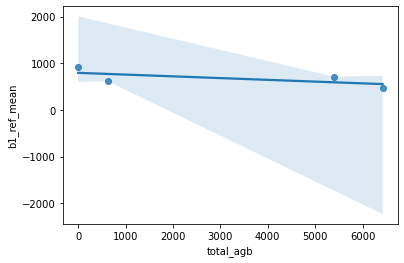

In [66]:
sns.regplot(x='total_agb', y='b1_ref_mean', data=data_frame)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data_frame.total_agb, data_frame.b1_ref_mean)

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [67]:
subset_all_df = pg_all_df_clean[["b1_ref_mean", "b1_ref_min", 'b1_ref_max', 'b1_ref_med',"total_agb"]]
subset_no0_df = pg_no0_df_clean[["b1_ref_mean", "b1_ref_min", 'b1_ref_max', 'b1_ref_med',"total_agb"]]
subset_some0_df = pg_some0_df_clean[["b1_ref_mean", "b1_ref_min", 'b1_ref_max', 'b1_ref_med',"total_agb"]]

In [59]:
subset_all_df.to_csv(os.path.join(output_dir, "pg_subset_all_df.csv"))
subset_no0_df.to_csv(os.path.join(output_dir, "pg_subset_no0_df.csv"))
subset_some0_df.to_csv(os.path.join(output_dir, "pg_subset_some0_df.csv"))

In [68]:
subset_all_df.to_csv(os.path.join(output_dir, "ref_subset_all_df.csv"))
subset_no0_df.to_csv(os.path.join(output_dir, "ref_subset_no0_df.csv"))
subset_some0_df.to_csv(os.path.join(output_dir, "ref_subset_some0_df.csv"))

## Adjust the subset of data to analyse

In [60]:
#df = subset_all_df
#df = subset_no0_df
df = subset_some0_df

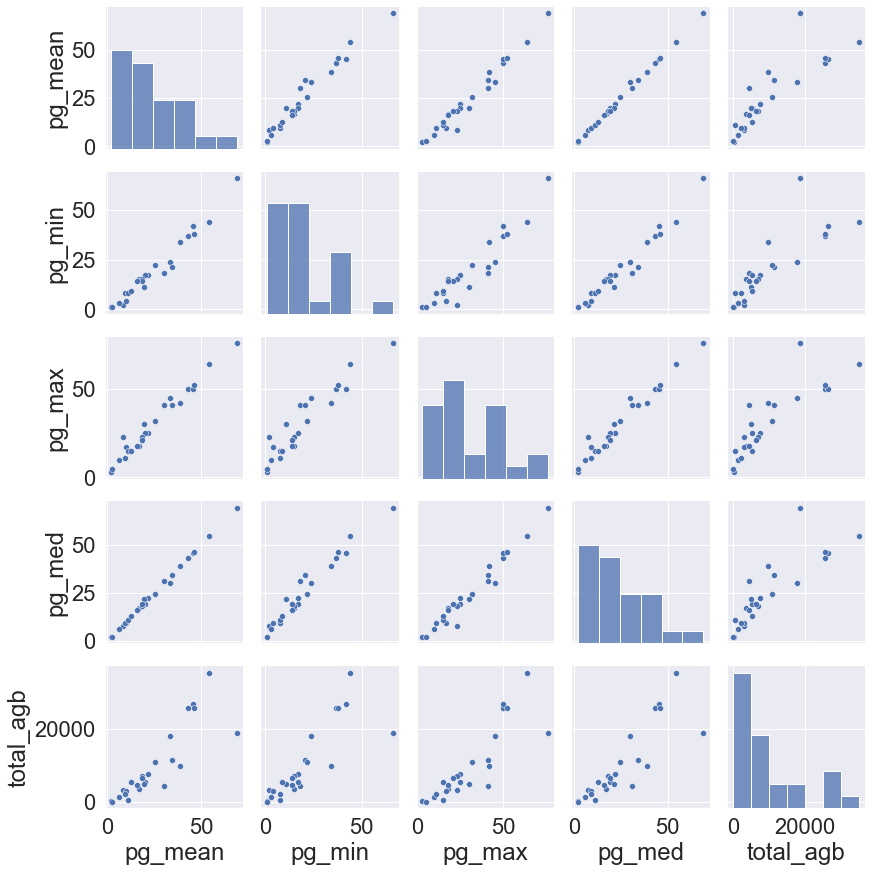

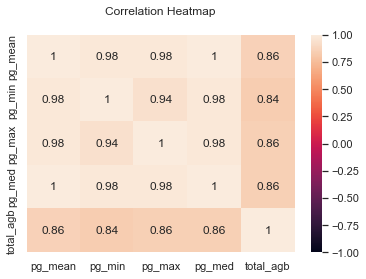

++++++++++++++++++++++++++++++++++++++++++++++++++


In [61]:
# pair plot
sns.set(font_scale = 2)
#print(frame.head(2))
sns.pairplot(df)
plt.show()

# heatmap
sns.set(font_scale = 1)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=20)
plt.show()
print("+"*50)

In [62]:
value_a = 'pg_mean'
value_b = 'total_agb'
# df = subset_all_df
# df = subset_no0df

C:\Users\rmcgr\anaconda3\envs\rmb_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\anaconda3\envs\rmb_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


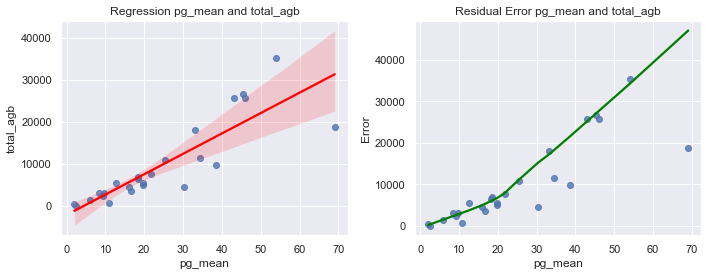

In [63]:
plt.figure(figsize=(10,4))
# left plot
plt.subplot(1,2,1)
sns.regplot(df[value_a], df[value_b], line_kws={"color":"red"})
plt.xlabel(value_a)
plt.ylabel(value_b)
plt.title("Regression {0} and {1}".format(value_a, value_b))

# right plot
plt.subplot(1,2,2)
sns.regplot(df[value_a], df[value_b], lowess=True, line_kws={"color":"green"})
plt.xlabel(value_a)
plt.ylabel("Error")
plt.title("Residual Error {0} and {1}".format(value_a, value_b))
plt.tight_layout()

In [64]:
x = df[value_a]
y = df[value_b]

In [65]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              total_agb   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     66.47
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           3.09e-08
Time:                        12:27:42   Log-Likelihood:                -247.45
No. Observations:                  25   AIC:                             498.9
Df Residuals:                      23   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2182.4847   1765.936     -1.236      0.2

In [66]:
value_ = value_b

C:\Users\rmcgr\anaconda3\envs\rmb_zonal\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


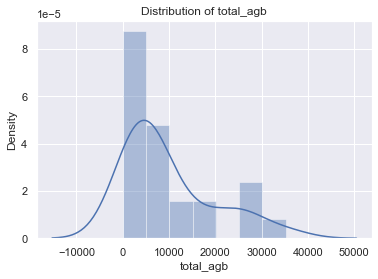

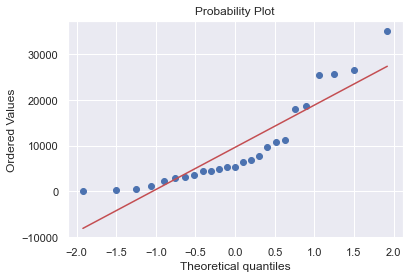

In [67]:
sns.distplot(df[value_]).set_title("Distribution of {0}".format(value_))

# probability plot
fig = plt.figure()
res = sc.probplot(df[value_], plot=plt)

### Due to the positive skewness a log transformation should be applied to correct data to a normal distribution

C:\Users\rmcgr\anaconda3\envs\rmb_zonal\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rmcgr\anaconda3\envs\rmb_zonal\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mean = 8.35 and std dev = 2.04



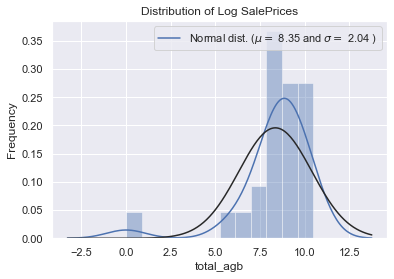

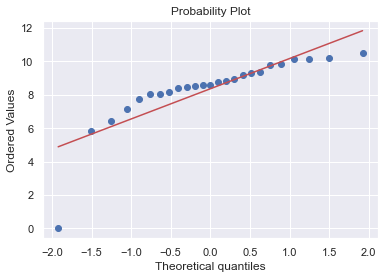

In [68]:
#Using the log1p function applies log(1+x) to all elements of the column
df[value_] = np.log1p(df[value_])

#Check the new distribution after log transformation 
sns.distplot(df[value_], fit=sc.norm)

# Get the fitted parameters used by the function
(mu, sigma) = sc.norm.fit(df[value_])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = sc.probplot(df[value_], plot=plt)
plt.show()